In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sinc_hanning(ntap,lblock):
    N=ntap*lblock
    w=np.arange(0,N)-N/2
    return np.hanning(ntap*lblock)*np.sinc(w/lblock)

def sinc(ntap,lblock):
    N=ntap*lblock
    w=np.arange(0,N)-N/2
    return np.sinc(w/lblock)

In [3]:
ntap=4
N=4096
nrows=10003
ndat=N*nrows
x=np.random.randn(nrows,N)

In [4]:
win=sinc_hanning(ntap,N)
winr=win.reshape(ntap,-1)
mat=np.zeros((nrows-ntap+1,N))
mat[:ntap,:]=winr

In [56]:
yreal=np.zeros((nrows-ntap+1,N),dtype='float64')
for i in range(nrows-ntap+1):
    yreal[i]=np.sum(x[i:i+ntap]*winr,axis=0)

In [57]:
yfake=yreal.copy() #has last three rows changed to actual convolution output

In [59]:
offset=3
nn=nrows-ntap+1
modval=nn
print(nn-offset)
yfake[-3]=winr[0]*x[(nn-offset)%modval] + winr[1]*x[(nn-offset+1)%modval] + winr[2]*x[(nn-offset+2)%modval] + winr[3]*x[(nn-offset+3)%modval]
offset=2
print(nn-offset)
yfake[-2]=winr[0]*x[(nn-offset)%modval] + winr[1]*x[(nn-offset+1)%modval] + winr[2]*x[(nn-offset+2)%modval] + winr[3]*x[(nn-offset+3)%modval]
offset=1
print(nn-offset)
yfake[-1]=winr[0]*x[(nn-offset)%modval] + winr[1]*x[(nn-offset+1)%modval] + winr[2]*x[(nn-offset+2)%modval] + winr[3]*x[(nn-offset+3)%modval]

9997
9998
9999


In [60]:
matft=np.fft.rfft(mat,axis=0)
xft=np.fft.rfft(x[:-3],axis=0)
yconv=np.fft.irfft(xft*np.conj(matft),axis=0)

In [64]:
np.max(np.abs(yconv-yfake))

2.6645352591003757e-15

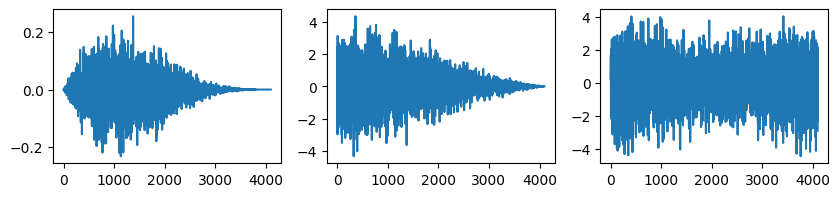

In [65]:
f=plt.gcf()
f.set_size_inches(10,2)
plt.subplot(131)
plt.plot(yfake[-3]-yreal[-3])
plt.subplot(132)
plt.plot(yfake[-2]-yreal[-2])
plt.subplot(133)
plt.plot(yfake[-1]-yreal[-1])

In [66]:
yfakeft=np.fft.rfft(yfake,axis=0)
yrealft=np.fft.rfft(yreal,axis=0)

In [67]:
xre_fake = np.fft.irfft(yfakeft/np.conj(matft),axis=0)
xre_real = np.fft.irfft(yrealft/np.conj(matft),axis=0)

In [72]:
np.max(np.abs(xre_fake-x[:-3,:]))

2.3314683517128287e-14

(100000.0, 110000.0)

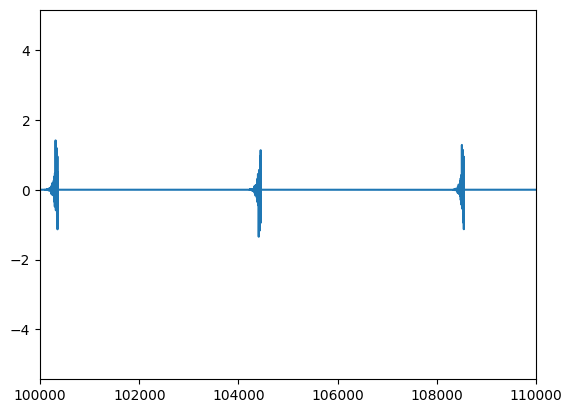

In [78]:
plt.plot(np.ravel(xre_fake)-np.ravel(xre_real))
plt.xlim(100000,100000+10000)

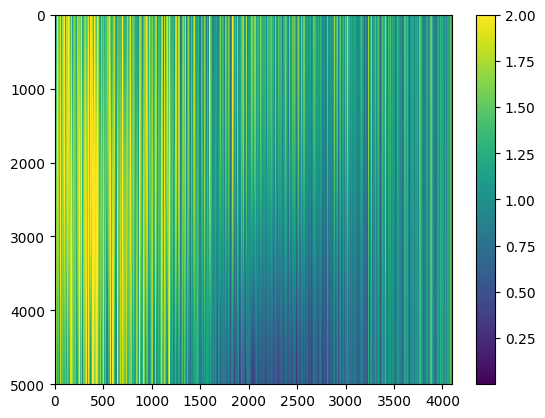

In [77]:
errft=yfakeft-yrealft
plt.imshow(np.abs(errft),aspect='auto',vmax=2)
plt.colorbar()

In [87]:
yfake-yreal

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -4.22401567e-05, -5.93577056e-04, ...,
         6.59743371e-11, -1.82175386e-11,  0.00000000e+00],
       [ 7.34530647e-04,  3.46213598e-01,  2.43474191e+00, ...,
        -4.49092689e-04,  4.95783006e-04,  6.23295845e-05],
       [ 2.55055493e-01,  1.10424103e+00,  1.24919114e+00, ...,
        -1.22495897e+00,  2.02934947e+00,  5.10423030e-01]])

In [87]:
xx=x[:-3,:].copy()

In [88]:
recons_err_fake=np.ravel(xre_fake)-np.ravel(xx)

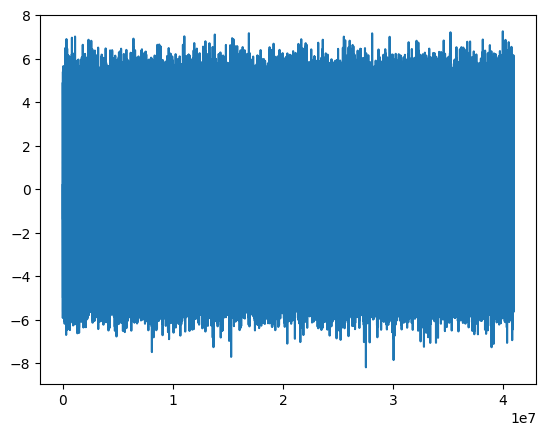

In [89]:
plt.plot(recons_err_fake)

In [90]:
recons_err_real=np.ravel(xre_real)-np.ravel(xx)

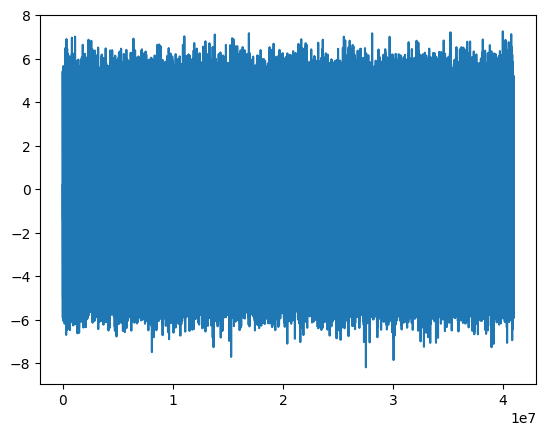

In [91]:
plt.plot(recons_err_real)